<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Yassaee</h4>
<h4 align="center">Sharif University of Technology, Autumn 2024</h4>

**Student Name**:**ADEL MOVAHEDIAN**

**Student ID**:**400102074**

# Logistic Regression

Logistic regression is a **supervised machine learning algorithm** primarily used for **binary classification tasks**. It predicts the probability of an outcome belonging to one of two classes (0 or 1) using a logistic function, specifically the **sigmoid function**, which maps any real-valued number into the range [0, 1].

### Key Features:
- **Binary Outcomes**: Logistic regression is suitable when the dependent variable is binary, such as yes/no or pass/fail.
- **Maximum Likelihood Estimation (MLE)**: Coefficients are estimated using MLE to maximize the likelihood of the observed data.
- **Interpretation**: The output can be interpreted as odds ratios, indicating how changes in independent variables affect the likelihood of an event.

### Types:
1. **Binary Logistic Regression**: Two possible outcomes.
2. **Multinomial Logistic Regression**: More than two categories.
3. **Ordinal Logistic Regression**: Ordered categories.

Logistic regression is widely used in fields like finance, healthcare, and social sciences for tasks such as risk assessment and disease diagnosis.

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

class MyLogisticRegression:
    # TODO: Initialize the class with necessary attributes, such as learning rate, number of iterations, and parameters (weights and bias).
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        """
        Initialize the logistic regression model.

        Parameters:
        - learning_rate: The step size for gradient descent.
        - num_iterations: The number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """
        Apply the sigmoid function element-wise.

        Parameters:
        - z: Input array (n_samples,).

        Returns:
        - The sigmoid of z.
        """
        return 1 / (1 + np.exp(-z))

    # TODO: Implement a loss function for logistic regression, using binary cross-entropy as the loss metric.
    def loss(self, y_true, y_pred):
        """
        Compute binary cross-entropy loss.

        Parameters:
        - y_true: Ground truth labels (n_samples,).
        - y_pred: Predicted probabilities (n_samples,).

        Returns:
        - The binary cross-entropy loss.
        """
        m = y_true.shape[0]
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m

    # TODO: Implement the fit method to train the model. Use gradient descent to update the weights and bias based on the training data.
    # Ensure that the code is optimized to run on GPU if available (e.g., by using torch tensors on GPU).
    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.

        Parameters:
        - X: Input features (n_samples, n_features).
        - y: Ground truth labels (n_samples,).
        """
        m, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            # Compute linear model output
            linear_model = np.dot(X, self.weights) + self.bias

            # Apply sigmoid function
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = np.dot(X.T, (y_pred - y)) / m
            db = np.sum(y_pred - y) / m

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # TODO: Implement the predict function that uses the learned weights and bias to output predictions on new data.
    # Apply a sigmoid function and set a threshold (e.g., 0.5) to determine the binary outcome.
    def predict(self, X):
        """
        Predict binary labels for given input features.

        Parameters:
        - X: Input features (n_samples, n_features).

        Returns:
        - Binary predictions (0 or 1) for each sample.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)


**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [2]:

# TODO: Load the dataset from Logistic_question.csv.
# Make sure to import necessary libraries for loading and handling CSV data (e.g., pandas, numpy).
data = pd.read_csv("Logistic_question.csv")

# TODO: Make the 'Target' column binary if necessary.
# For example, you could map specific values to 0 and 1 based on conditions.
data['Target'] = data['Target'].map(lambda x : 1 if x > 0.5 else 0)

# TODO: Split the data into features (X) and target (y).
# Then, split the data into training and testing sets with an 80-20 split.
X = data.drop(columns=['Target']).to_numpy()
y = data['Target'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Normalize the training data (X_train) and use the same scaling parameters to normalize X_test.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TODO: Create an instance of MyLogisticRegression.
# Fit the model on the training set (X_train, y_train).
model = MyLogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

# TODO: Predict the target values on the test set (X_test).
y_pred = model.predict(X_test)

# TODO: Calculate and print 4 different evaluation metrics on the test set predictions.
# Suggested metrics: accuracy, precision, recall, and F1-score.
# You may want to import these metrics from sklearn (e.g., accuracy_score, precision_score, recall_score, f1_score).
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

Evaluation Metrics:
Accuracy: 0.938
Precision: 0.933
Recall: 1.000
F1-Score: 0.966


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:** <br>
1. **Accuracy**: The ratio of correct predictions to total instances. Works well for balanced datasets but can be misleading for imbalanced ones.  

2. **Precision**: Measures the proportion of true positives among predicted positives. Important when false positives are costly (e.g., spam or fraud detection).  

3. **Recall**: The proportion of true positives identified out of all actual positives. Critical when false negatives are unacceptable (e.g., medical diagnoses or safety systems).  

4. **F1-Score**: The harmonic mean of precision and recall. Useful for imbalanced datasets to balance the trade-off between the two.**

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [3]:
# TODO: Create an instance of LogisticRegression from scikit-learn.
sklearn_model = LogisticRegression()

# TODO: Fit the built-in Logistic Regression model on the training set (X_train, y_train).
sklearn_model.fit(X_train, y_train)

# TODO: Use the trained model to predict on the test set (X_test).
sklearn_predictions = sklearn_model.predict(X_test)

# TODO: Calculate and print the same evaluation metrics as before (e.g., accuracy, precision, recall, F1-score)
# to compare the performance of the custom model with the built-in Logistic Regression.
accuracy = accuracy_score(y_test, sklearn_predictions)
precision = precision_score(y_test, sklearn_predictions)
recall = recall_score(y_test, sklearn_predictions)
f1 = f1_score(y_test, sklearn_predictions)

print("Evaluation Metrics for Scikit-learn Logistic Regression:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

Evaluation Metrics for Scikit-learn Logistic Regression:
Accuracy: 0.950
Precision: 0.946
Recall: 1.000
F1-Score: 0.972


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**<br>
**Scikit-learn's LogisticRegression outperforms custom models** **due to its optimized algorithms, ensuring speed, numerical stability, and scalability. Key advantages include:**
**1. Regularization (penalty, C): Prevents overfitting. L2 (default) ensures small coefficients, while L1 encourages sparsity. C controls strength—smaller values enforce stronger regularization.**
**2. Flexible solvers: Algorithms like 'lbfgs' (efficient for large datasets) and 'saga' (handles sparse data) ensure fast, reliable convergence tailored to dataset size and type.**
**3. Robustness: Handles numerical issues and edge cases better, producing consistent, high-quality results.**
**These features make it faster, more stable, and easier to use than custom implementations.**

# Multinomial Logistic Regression

Multinomial logistic regression is a statistical method used for **classifying outcomes** when the dependent variable has **more than two categories**. Unlike binary logistic regression, which handles only two possible outcomes, multinomial logistic regression can predict the probabilities of multiple discrete outcomes based on one or more independent variables, which can be continuous or categorical.

### Key Features:
- **Generalization of Logistic Regression**: It extends the binary logistic model to handle multiclass problems, making it suitable for scenarios like predicting consumer preferences or classifying types of jobs.
- **Probability Estimation**: The model estimates the probability of each category by calculating a score for each potential outcome and applying the softmax function to convert these scores into probabilities.
- **Modeling Approach**: It can be conceptualized as running multiple binary logistic regressions, where one category is treated as a reference (or pivot) against which others are compared.

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [4]:
import numpy as np

class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, n_classes=None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.n_classes = n_classes
        self.weights = None
        self.bias = None

    def softmax(self, z):
        # Numerical stability optimization
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def loss(self, y_true, y_pred):
        m = len(y_true)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        log_likelihood = -np.sum(y_true * np.log(y_pred))
        return log_likelihood / m

    def fit(self, X, y):
        m, n_features = X.shape
        self.n_classes = self.n_classes or len(np.unique(y))

        # Initializing weights and bias
        self.weights = np.zeros((n_features, self.n_classes))
        self.bias = np.zeros((1, self.n_classes))

        # One-hot encode y
        y_one_hot = np.eye(self.n_classes)[y]

        # Gradient descent loop
        for _ in range(self.num_iterations):
            linear_model = X @ self.weights + self.bias  # Use @ for matrix multiplication
            y_pred = self.softmax(linear_model)

            # Calculate gradients
            dw = X.T @ (y_pred - y_one_hot) / m
            db = np.sum(y_pred - y_one_hot, axis=0, keepdims=True) / m

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = X @ self.weights + self.bias
        y_pred = self.softmax(linear_model)
        return np.argmax(y_pred, axis=1)  # Return class with highest probability


**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.


Quantization Level 2 :
My Logistic Regression Accuracy: 0.88
My Logistic Regression Precision: 0.87
My Logistic Regression Recall: 0.84
My Logistic Regression F1 Score: 0.85

Quantization Level 3 :
My Logistic Regression Accuracy: 0.79
My Logistic Regression Precision: 0.71
My Logistic Regression Recall: 0.64
My Logistic Regression F1 Score: 0.62

Quantization Level 4 :
My Logistic Regression Accuracy: 0.85
My Logistic Regression Precision: 0.88
My Logistic Regression Recall: 0.78
My Logistic Regression F1 Score: 0.78

Quantization Level 5 :
My Logistic Regression Accuracy: 0.64
My Logistic Regression Precision: 0.69
My Logistic Regression Recall: 0.54
My Logistic Regression F1 Score: 0.50

Quantization Level 6 :
My Logistic Regression Accuracy: 0.86
My Logistic Regression Precision: 0.88
My Logistic Regression Recall: 0.78
My Logistic Regression F1 Score: 0.73

Quantization Level 7 :
My Logistic Regression Accuracy: 0.70
My Logistic Regression Precision: 0.74
My Logistic Regression R

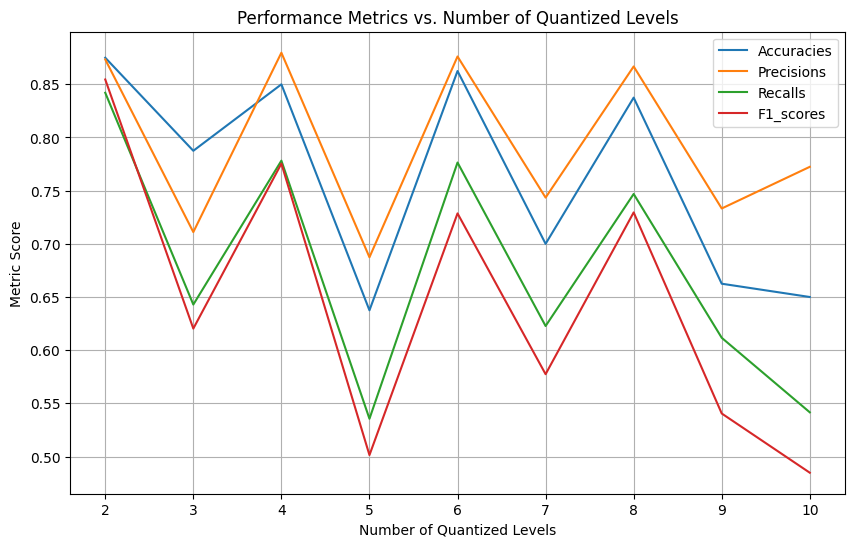

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('Logistic_question.csv')

# Initialize lists for evaluation metrics
metrics = {'accuracies': [], 'precisions': [], 'recalls': [], 'f1_scores': []}

# Iterate over quantization levels from 2 to 10
for i in range(2, 11):
    print(f"\nQuantization Level {i} :")

    # Quantize the 'Target' column into `i` levels
    data[f'quantized_target_{i}'] = pd.cut(data['Target'], bins=i, labels=range(i))

    # Split data into features (X) and quantized target (y)
    X, y = data.drop(columns=['Target', f'quantized_target_{i}']).to_numpy(), data[f'quantized_target_{i}'].astype(int).to_numpy()

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the data
    scaler = StandardScaler()
    X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

    # Create and fit the model
    model = MyMultinomialLogisticRegression(learning_rate=0.01, num_iterations=1000, n_classes=i)
    model.fit(X_train, y_train)

    # Predict and calculate evaluation metrics
    y_pred = model.predict(X_test)
    metrics['accuracies'].append(accuracy_score(y_test, y_pred))
    metrics['precisions'].append(precision_score(y_test, y_pred, average='macro', zero_division=1))
    metrics['recalls'].append(recall_score(y_test, y_pred, average='macro', zero_division=1))
    metrics['f1_scores'].append(f1_score(y_test, y_pred, average='macro', zero_division=1))

    # Print metrics for the current quantization level
    print(f"My Logistic Regression Accuracy: {metrics['accuracies'][-1]:.2f}")
    print(f"My Logistic Regression Precision: {metrics['precisions'][-1]:.2f}")
    print(f"My Logistic Regression Recall: {metrics['recalls'][-1]:.2f}")
    print(f"My Logistic Regression F1 Score: {metrics['f1_scores'][-1]:.2f}")

# Plot performance metrics across quantization levels
fig, ax = plt.subplots(figsize=(10, 6))
for metric, values in metrics.items():
    ax.plot(range(2, 11), values, label=metric.capitalize())

ax.set(xlabel='Number of Quantized Levels', ylabel='Metric Score', title='Performance Metrics vs. Number of Quantized Levels')
ax.legend()
ax.grid(True)
plt.show()


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**<br>
**Here the value of i = 2 gives the best performance, with all metrics—accuracy, precision, recall, and F1-score—showing stable and balanced results. However, the ideal value of i can vary depending on the specific data and the nature of the task. Each evaluation metric holds different importance: precision is particularly crucial when false positives are expensive or harmful, while accuracy is more important when you want to ensure overall balanced performance across all classes.**

# Going a little further!(bonus*)

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [6]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [7]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zipnon

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
adult-income-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open /content/adult-income-dataset.zipnon, /content/adult-income-dataset.zipnon.zip or /content/adult-income-dataset.zipnon.ZIP.


**Task:** Determine the number of null entries!

In [8]:
import pandas as pd
import numpy as np

# Load the dataset into a pandas DataFrame
data = pd.read_csv('adult.csv')

# Replace '?' with NaN to handle missing values
data.replace('?', np.nan, inplace=True)

# Calculate the number of null entries for each column
null_counts = data.isnull().sum()

# Display the number of null entries per column
print("Null entries per column:")
print(null_counts)

# Calculate the total number of null entries in the dataset
total_nulls = null_counts.sum()
print(f'Total number of null entries: {total_nulls}')


Null entries per column:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64
Total number of null entries: 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**<br>
**Handling missing data is a key challenge in machine learning, and choosing the right approach is essential for building effective models. Common techniques for addressing null values include removing rows or columns when missing data is minimal, imputing missing values with measures like the mean, median, or mode (though this can distort the data if many values are missing), and using predictive methods like regression or KNN to estimate missing values, which is accurate but computationally intensive. Another method is replacing missing data with special placeholders (e.g., "Unknown" or -1), which preserves data but may introduce bias if the missingness follows a pattern. Some algorithms, such as decision trees, can handle missing data directly without preprocessing, although their effectiveness can vary. The choice of method depends on the amount and type of missing data, and careful validation is necessary to maintain data integrity and model performance.**

**Task:** Handle null entries using your best method.

In [9]:

# TODO: Determine the best method for handling null entries.
# Options include:
# - Dropping rows with null values using .dropna() if they are few in number.
# - Filling null values with a specific value (e.g., mean, median, or mode) using .fillna().
# - Consider more sophisticated methods, such as interpolation or model-based imputation, if appropriate.
data_cleaned = data.fillna(data.mode().iloc[0])

# TODO: Implement the chosen method to handle null entries in the dataset.
# For example, if dropping rows, use:
# data_cleaned = data.dropna()
data_cleaned = data.dropna()

# TODO: If filling null values, decide on the strategy (mean, median, mode) for each relevant column.
# For example:
# data['column_name'].fillna(data['column_name'].mean(), inplace=True)

# TODO: After handling null entries, verify that there are no more null values in the dataset.
# This can be done using the .isnull().sum() method again.

# TODO: Print the results to confirm that null entries have been handled successfully.
print(data_cleaned.isnull().sum().sum())

0


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [10]:
# TODO: Convert categorical features to numerical values using appropriate encoding methods.
# Options include one-hot encoding with pd.get_dummies() or label encoding using sklearn's LabelEncoder.
data_cleaned['income'] = data_cleaned['income'].map(lambda x : 1 if x == '>50K' else 0)
label_encoder = LabelEncoder()
new_data = data_cleaned.copy()
for column in data_cleaned.columns:
    if new_data[column].dtype == 'object' and column != 'income':
        new_data[column] = label_encoder.fit_transform(data_cleaned[column])

# TODO: Split the dataset into features (X) and target (y).
# For example, set X to all columns except the target and y to the target column.
X = new_data.drop('income', axis=1)
y = new_data['income']

# TODO: Use train_test_split from sklearn to split the dataset into training and testing sets with an 80-20 ratio.
# Set random_state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Normalize the features using a method such as StandardScaler or MinMaxScaler.
# Fit the scaler on X_train and transform both X_train and X_test.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TODO: Import the LogisticRegression model and GridSearchCV from sklearn.
# Create an instance of LogisticRegression and specify the parameters you want to tune.
log_reg = LogisticRegression()

# TODO: Define a parameter grid for GridSearchCV to search over.
# This should include hyperparameters such as 'C' (regularization strength), 'solver', etc.
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# TODO: Fit the GridSearchCV to the training data (X_train, y_train).
# Ensure you specify the scoring metric you want to optimize (e.g., accuracy).
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# TODO: Retrieve the best model and its parameters from GridSearchCV.
# Print the best parameters found by GridSearchCV.
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# TODO: Evaluate the best model on the training set and the test set.
# Calculate and print the training and testing accuracy.
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# TODO: Print the results to summarize the model performance.
y_pred = best_model.predict(X_test)
print("\n",classification_report(y_test, y_pred))

<ipython-input-10-5b602151d1b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['income'] = data_cleaned['income'].map(lambda x : 1 if x == '>50K' else 0)


Best Parameters:  {'C': 0.1, 'solver': 'lbfgs'}
Training Accuracy: 0.82
Testing Accuracy: 0.82

               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6842
           1       0.71      0.45      0.55      2203

    accuracy                           0.82      9045
   macro avg       0.78      0.69      0.72      9045
weighted avg       0.81      0.82      0.81      9045



**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [11]:
# TODO: Set the value of i to 10 for splitting the training data into parts.
i = 10

# TODO: Split X_train into i parts. You can use numpy's array_split function or similar methods.
# This will create a list of subsets of X_train and the corresponding subsets of y_train.
X_parts = np.array_split(X_train, i)
y_parts = np.array_split(y_train, i)

# TODO: Initialize a list to store the models trained on each part of the data.
models = []

# TODO: For each part (subset) of the training data:
#       - Create an instance of your custom MyLogisticRegression model.
#       - Fit the model on the subset (X_part, y_part).
#       - Store the trained model in the list of models.
for X_part, y_part in zip(X_parts, y_parts):
    model = MyLogisticRegression(learning_rate=0.01, num_iterations=1000)  # Define your custom model
    model.fit(X_part, y_part)
    models.append(model)

# TODO: Define the three ensemble methods you want to implement.
# Bagging: Averages the predictions of each model
def bagging(models, X):
    predictions = np.zeros((len(models), X.shape[0]))  # Initialize array to store predictions
    for idx, model in enumerate(models):
        predictions[idx] = model.predict(X).flatten()  # Flatten to ensure 1D array for each model's prediction
    return np.round(np.mean(predictions, axis=0))  # Majority vote (rounding to nearest integer)

# Boosting: Sums up predictions of each model
def boosting(models, X):
    final_prediction = np.zeros(X.shape[0])  # Initialize final prediction array
    for model in models:
        final_prediction += model.predict(X).flatten()  # Sum up predictions
    return np.sign(final_prediction)  # Sign to classify as 1 or -1

# Stacking: Uses the predictions of each base model to train a final model
def stacking(models, X_train, y_train, X_test):
    base_predictions = np.array([model.predict(X_train) for model in models]).T  # Collect predictions of all models
    base_predictions = base_predictions.reshape(X_train.shape[0], -1)  # Reshape to (n_samples, n_models)

    final_model = LogisticRegression()  # Logistic regression as the meta-model
    final_model.fit(base_predictions, y_train)  # Fit the meta-model on the predictions of the base models

    base_predictions_test = np.array([model.predict(X_test) for model in models]).T
    base_predictions_test = base_predictions_test.reshape(X_test.shape[0], -1)

    return final_model.predict(base_predictions_test)  # Predict on the test data using the meta-model

# TODO: Evaluate and compare the test accuracy of each ensemble method on X_test.
# Print the test accuracy for each ensemble method.
bagging_predictions = bagging(models, X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)

boosting_predictions = boosting(models, X_test)
boosting_accuracy = accuracy_score(y_test, boosting_predictions)

stacking_predictions = stacking(models, X_train, y_train, X_test)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)

print(f"Bagging Test Accuracy: {bagging_accuracy}")
print(f"Boosting Test Accuracy: {boosting_accuracy}")
print(f"Stacking Test Accuracy: {stacking_accuracy}")

# TODO: Based on the results, determine which ensemble method performed the best on the test set.
best_method = max(
    [('Bagging', bagging_accuracy),
     ('Boosting', boosting_accuracy),
     ('Stacking', stacking_accuracy)],
    key=lambda x: x[1]
)

print(f"The best ensemble method is {best_method[0]} with an accuracy of {best_method[1]}")


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Bagging Test Accuracy: 0.8134881149806523
Boosting Test Accuracy: 0.8092868988391376
Stacking Test Accuracy: 0.8160309563294638
The best ensemble method is Stacking with an accuracy of 0.8160309563294638


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**<br>
**Bagging, Boosting, and Stacking are three ensemble methods used to improve model performance. Bagging (Bootstrap Aggregating) trains multiple models independently on different data subsets and combines their predictions to reduce variance and avoid overfitting. Boosting builds models sequentially, with each new model focusing on correcting the errors made by the previous one, and it weighs predictions to enhance accuracy by reducing bias. Stacking combines predictions from multiple models as inputs to a final meta-model, leveraging the strengths of diverse models for better performance. The most effective method is selected based on its accuracy on the test set.**


**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

The best value of i is 100 with a training accuracy of 0.8122011222599994 and a test accuracy of 0.815257048092869


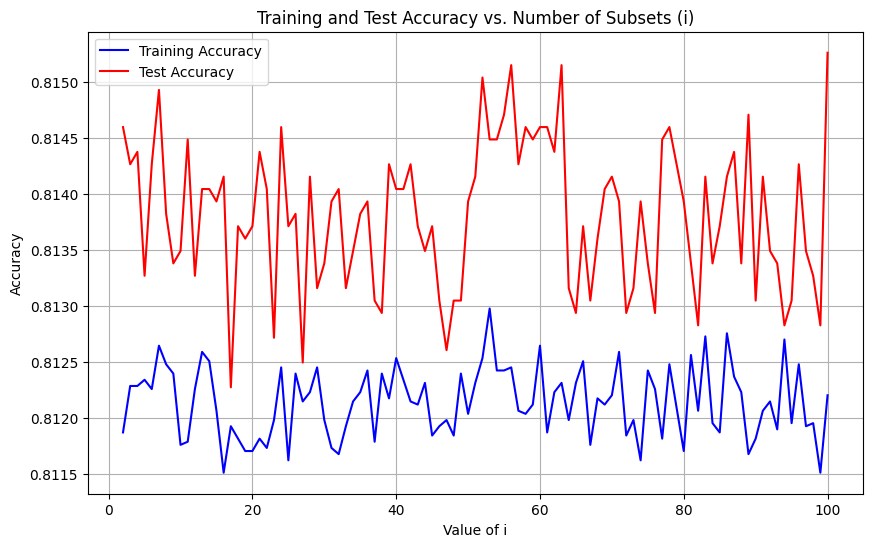

In [12]:
import warnings

warnings.filterwarnings("ignore")
# TODO: Initialize lists to store the values of i, training accuracies, and testing accuracies.
i_values = []
training_accuracies = []
test_accuracies = []

# TODO: Iterate over the range of i from 2 to 100
for i in range(2, 101):
    # Split the training data into i parts
    X_parts, y_parts = np.array_split(X_train, i), np.array_split(y_train, i)

    models = []

    # TODO: Train models on each subset of data
    for X_part, y_part in zip(X_parts, y_parts):
        model = MyLogisticRegression(learning_rate=0.01, num_iterations=1000)
        model.fit(X_part, y_part)
        models.append(model)

    # TODO: Get predictions for the training and test data
    train_predictions = np.round(np.mean([model.predict(X_train) for model in models], axis=0))
    test_predictions = np.round(np.mean([model.predict(X_test) for model in models], axis=0))

    # TODO: Compute accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Store the results
    i_values.append(i)
    training_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# TODO: Identify the best value of i based on test accuracy
best_i = max(zip(i_values, test_accuracies), key=lambda x: x[1])[0]
best_train_accuracy = training_accuracies[i_values.index(best_i)]
best_test_accuracy = max(test_accuracies)

# TODO: Print the best i value along with corresponding accuracies
print(f"The best value of i is {best_i} with a training accuracy of {best_train_accuracy} and a test accuracy of {best_test_accuracy}")

# TODO: Plot the accuracies as a function of i
plt.figure(figsize=(10, 6))
plt.plot(i_values, training_accuracies, label='Training Accuracy', color='blue')
plt.plot(i_values, test_accuracies, label='Test Accuracy', color='red')
plt.xlabel('Value of i')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs. Number of Subsets (i)')
plt.legend()
plt.grid(True)
plt.show()


**Question:** Analyze the results.

**Your Answer:**<br>
**as the number of splits (denoted as i) increases, the test accuracy of the model also tends to improve. This happens because splitting the data into more parts allows the model to learn from different subsets, which can help it generalize better to new, unseen data. This process is beneficial because it exposes the model to a wider variety of patterns in the data, allowing it to learn more robust features that are not overfitted to any particular subset.
However, the relationship between i and test accuracy is not linear, meaning that the improvement in test accuracy becomes smaller as i gets larger. Initially, increasing i significantly boosts the model's performance, but beyond a certain point, the benefit of adding more splits starts to decrease. This suggests that there is a limit to how much additional information the model can gain by splitting the data further. Eventually, the model may begin to overfit to the small variations in each split, and the advantage of adding more splits diminishes. This diminishing return highlights the importance of finding an optimal value of i—increasing it can help, but at some point, the impact on performance will plateau.**